In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
path_to_png_file	=	r"C:\Users\xlassix\Pictures\test4.jpg"# directory
#	wherever	your	image	is 
import	matplotlib.image	as	mpimg 
img	=	mpimg.imread(path_to_png_file)
print("intial dimension:",img.shape)

#convert to gray
img_gray=np.mean(img,axis=2,dtype=np.uint)
print("gray image dimension:",img_gray.shape)
plt.figure()
plt.imshow(img)
plt.show()

intial dimension: (433, 577, 3)
gray image dimension: (433, 577)


<Figure size 640x480 with 1 Axes>

In [2]:
def conv(image,im_filter):
    #compute dimesions of image
    height,width=image.shape
    #output image size init with zero
    out_image=np.zeros((height-len(im_filter) +1,width-len(im_filter)+1))
    
    #calcuating the out_image
    for row in range(len(out_image)):
        for col in range(len(out_image[0])):
            #apply filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    out_image[row,col]+=image[row+i,col+j]*im_filter[i][j]
    #fix cumulative that exceed 255
    out_image[out_image>255]=255
    out_image[out_image<0]=0
    
    #plotting image
    plt.figure()
    plt.imshow(image,cmap=cm.gray_r)
    plt.show()
    
    #plotting out_image
    plt.figure()
    plt.imshow(out_image,cmap=cm.gray)
    plt.show()
    return out_image

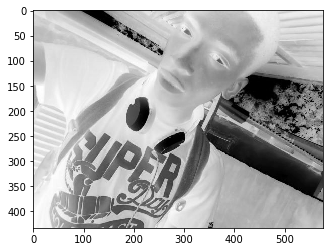

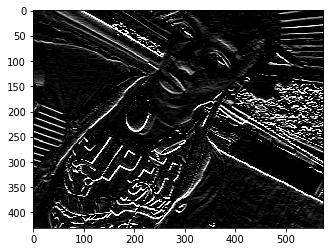

array([[ 0.,  0.,  0., ..., 10., 10.,  5.],
       [ 0.,  0.,  4., ..., 10., 10.,  5.],
       [18., 18., 19., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  3., ..., 12., 14., 16.],
       [ 0.,  1.,  3., ...,  6.,  5.,  9.],
       [ 0.,  0.,  0., ..., 27., 13., 18.]])

In [3]:
edge_detection=([[4,2,4]
                ,[-1,0,1]
                ,[-4,-2,-4]])

conv(img_gray,edge_detection)


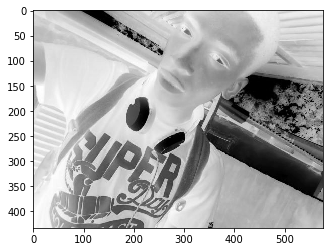

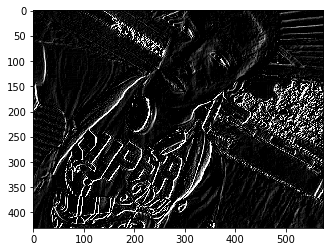

array([[28., 31.,  9., ...,  4.,  4., 11.],
       [55., 41., 19., ...,  4.,  4., 11.],
       [57., 57., 34., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  5.,  0.],
       [ 7.,  0.,  0., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  6.]])

In [4]:
edge_detection1=([[1,2,1]
                ,[8,0,-8]
                ,[-1,-2,-1]])

conv(img_gray,edge_detection1)


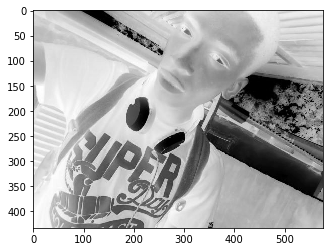

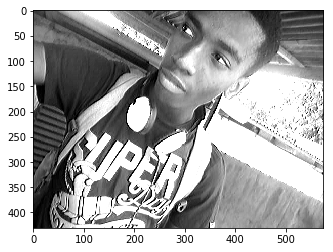

array([[ 84.,  78.,  66., ...,  31.,  31.,  33.],
       [ 89.,  82.,  69., ...,  30.,  30.,  31.],
       [ 89.,  83.,  69., ...,  29.,  29.,  31.],
       ...,
       [  1.,   0.,   0., ..., 111., 110., 108.],
       [  3.,   0.,   0., ..., 109., 107., 109.],
       [  3.,   0.,   0., ..., 106., 106., 109.]])

In [5]:
edge_detection=([[1,0,0]
                ,[2,0,-1]
                ,[1,0,-1]])

conv(img_gray,edge_detection)

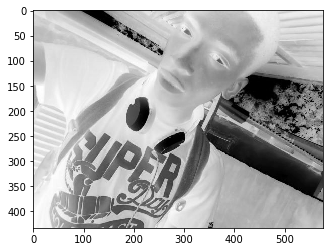

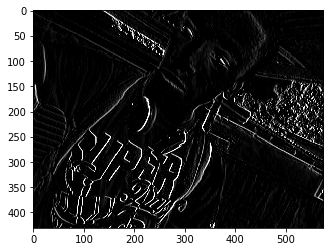

In [6]:
edge_detection=([[1,0,-1]
                ,[2,0,-2]
                ,[1,0,-1]])

z=conv(img_gray,edge_detection)

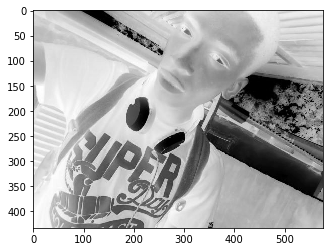

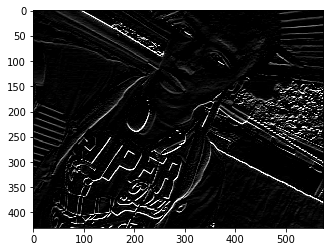

In [7]:
edge_detection=([[1,2,1]
                ,[0,0,0]
                ,[-1,-1,-2]])

y=conv(img_gray,edge_detection)

In [8]:
ans=(y+z)
    

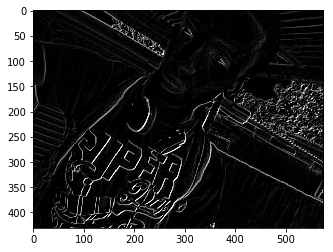

In [9]:
plt.figure()
plt.imshow(ans,cmap=cm.gray)
plt.show()